<a href="https://colab.research.google.com/github/sergiocabrales/BitCoin/blob/master/SAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Negociación basados en Machine Learning - Módulo 4
- Sergio Andrés Cabrales, Ph.D., Universidad de los Andes 
- Juan Pablo Cortés, T.A., Universidad de los Andes

https://github.com/algoritmosdenegociacion/

## 1. Carga de librerías, funciones y APIs necesarias.


#### 1.1. Instalan las librerías que no incluye Google Colab

In [232]:
pip install yfinance

#### 1.2. Se cargan las librerías necesarias

In [233]:
# Funciones numéricas adicionales
import numpy as np

# Lectura de datos y manejo de Data-sets
import pandas as pd

# Datos
import yfinance as yfin

# Gráficos 
import matplotlib.pyplot as plt

## 2. Obtención de datos históricos


https://finance.yahoo.com/

In [234]:
# Descargamos datos de 1 años de la acción de Tesla
df = yfin.download('BTC-USD', data_source='yahoo',start='2015-01-01', end='2021-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774
2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704


## 3. Análisis Técnico 

In [235]:
pip install ta

In [236]:
# Importar librerias 
import ta

In [237]:
# Incluir todo el anáñisis técnico a la base de datos
df['SMA_5'] = ta.trend.sma_indicator(close=df["Close"], window=5, fillna=True)/df["Close"] 
df['SMA_20'] = ta.trend.sma_indicator(close=df["Close"], window=20, fillna=True)/df["Close"] 
df['SMA_20_5'] = ta.trend.sma_indicator(close=df["Close"], window=5, fillna=True)/ta.trend.sma_indicator(close=df["Close"], window=20, fillna=True)

df['EMA_5'] = ta.trend.ema_indicator(close=df["Close"], window=5, fillna=True)/df["Close"]
df['EMA_20'] = ta.trend.ema_indicator(close=df["Close"], window=20, fillna=True)/df["Close"] 
df['EMA_20_5'] = ta.trend.ema_indicator(close=df["Close"], window=20, fillna=True)/ta.trend.ema_indicator(close=df["Close"], window=5, fillna=True)


df['MACD'] = ta.trend.macd(close=df["Close"], fillna=True)

df['RSI'] = ta.momentum.rsi(close=df["Close"], fillna=True)

df['BOL_H'] = ta.volatility.bollinger_hband(close=df["Close"], fillna=True)/df["Close"]
df['BOL_L'] = df["Close"]/ta.volatility.bollinger_lband(close=df["Close"], fillna=True)

df['BOL_H_L'] = ta.volatility.bollinger_hband(close=df["Close"], fillna=True)/ta.volatility.bollinger_lband(close=df["Close"], fillna=True)

df['KDJ'] = ta.momentum.stoch(high=df["High"], low=df["Low"], close=df["Close"], fillna=True)/df["Close"]

df['ATR'] = ta.volatility.average_true_range(high=df["High"], low=df["Low"], close=df["Close"], fillna=True)/df["Close"]

df['WR'] = ta.momentum.williams_r(high=df["High"], low=df["Low"], close=df["Close"], fillna=True)

df.drop('Open', axis=1, inplace=True)
df.drop('High', axis=1, inplace=True)
df.drop('Low', axis=1, inplace=True)
df.drop('Volume', axis=1, inplace=True)
df.drop('Adj Close', axis=1, inplace=True)

df

,Close,SMA_5,SMA_20,SMA_20_5,EMA_5,EMA_20,EMA_20_5,MACD,RSI,BOL_H,BOL_L,BOL_H_L,KDJ,ATR,WR
Date,,,,,,,,,,,,,,,
2015-01-01,314.248993,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,100.000000,1.000000,1.000000,1.000000,0.012171,0.000000,-96.175343
2015-01-02,315.032013,0.998757,0.998757,1.000000,0.998343,0.997751,0.999407,0.062463,100.000000,1.001243,1.003742,1.004990,0.067783,0.000000,-78.646120
2015-01-03,281.082001,1.079594,1.079594,1.000000,1.079284,1.107000,1.025680,-2.597573,2.096744,1.192179,1.034117,1.232853,0.000000,0.000000,-100.000000
2015-01-04,264.195007,1.111450,1.111450,1.000000,1.098847,1.160828,1.056406,-5.999156,1.375421,1.276744,1.056909,1.349402,0.039663,0.000000,-89.521341
2015-01-05,274.473999,1.055861,1.055861,1.000000,1.038464,1.106179,1.065207,-7.775871,19.523695,1.208739,1.107441,1.338607,0.097789,0.000000,-73.159512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,27084.808594,0.946618,0.819852,1.154621,0.953665,0.847414,0.888587,2039.260227,78.691073,1.029048,1.637584,1.685153,0.003209,0.046034,-13.074509
2020-12-29,27362.437500,0.963521,0.827630,1.164193,0.962659,0.854167,0.887299,2137.404010,79.349097,1.040667,1.627096,1.693266,0.003278,0.045924,-10.304209
2020-12-30,28840.953125,0.943086,0.803537,1.173669,0.942206,0.828438,0.879253,2307.883673,82.456164,1.013583,1.684946,1.707832,0.003424,0.044365,-1.256475


In [238]:
# Crea el Target (1 si el precio sube el día siguiente, -1 si baja)
target = np.where(np.array(df['Close'].iloc[1:]) > np.array(df['Close'].iloc[:-1]), 1, -1)
df.drop('Close', axis=1, inplace=True)

# Elimina el ultimo día para el que no tenemos info del precio el día siguiente.
df.drop(df.tail(1).index, inplace=True)

# Creamos la columna target
df['Target'] = target

# Elimina los primeros 29 días dónde los indicadores técnicos no tienen suficiente info
df.drop(df.head(29).index, inplace=True)

df

,SMA_5,SMA_20,SMA_20_5,EMA_5,EMA_20,EMA_20_5,MACD,RSI,BOL_H,BOL_L,BOL_H_L,KDJ,ATR,WR,Target
Date,,,,,,,,,,,,,,,
2015-01-30,1.087160,1.019473,1.066394,1.049650,1.075117,1.024262,-8.864036,42.046589,1.237219,1.247307,1.543193,0.122712,0.096052,-72.214867,-1
2015-01-31,1.080447,1.050401,1.028605,1.061935,1.108046,1.043421,-9.947985,39.545291,1.266125,1.198069,1.516905,0.091899,0.098515,-80.015315,1
2015-02-01,1.003022,0.997406,1.005630,1.011633,1.055760,1.043619,-9.925393,43.393165,1.188158,1.239689,1.472947,0.092229,0.093801,-79.066689,1
2015-02-02,0.959248,0.952871,1.006692,0.975887,1.005313,1.030153,-8.896588,47.642203,1.135889,1.298948,1.475461,0.133205,0.088837,-68.266636,-1
2015-02-03,1.000016,1.009644,0.990463,1.015302,1.048675,1.032869,-8.863540,44.165876,1.174198,1.183305,1.389435,0.071963,0.093219,-83.645031,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.946635,0.828529,1.142550,0.959275,0.857064,0.893450,1912.598775,76.670934,1.035586,1.609085,1.666346,0.002979,0.047649,-21.739074,1
2020-12-28,0.946618,0.819852,1.154621,0.953665,0.847414,0.888587,2039.260227,78.691073,1.029048,1.637584,1.685153,0.003209,0.046034,-13.074509,1
2020-12-29,0.963521,0.827630,1.164193,0.962659,0.854167,0.887299,2137.404010,79.349097,1.040667,1.627096,1.693266,0.003278,0.045924,-10.304209,1


In [239]:
# Divida el conjunto de datos en una característica o un conjunto de datos independiente (X) y un destino o conjunto de datos dependiente (Y)
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])

print(X.shape)
print(Y.shape)

(2159, 14)
(2159,)


## 4. Conjunto de entrenamiento y prueba

In [265]:
# Importar libreria de sklearn 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

In [266]:
# Vuelva a dividir los datos, pero esta vez en 80% de entrenamiento y 20% de prueba.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state=1)

In [267]:
print(X_train.shape)
print(X_test.shape)

(1943, 14)
(216, 14)


## 5. Machine Learning - Support vector machine (SVM)

In [268]:
# Support Vector Machine (SVM) es un algoritmo de tipo aprendizaje automático supervisado.
# SVC se refiere a Support Vector Classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [269]:
#Standardization
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

In [304]:
#svc = SVC(kernel='linear')
# Polynomial Kernel
# svc  = SVC(kernel='poly', degree=2)
# Gaussian Kernel
svc = SVC(kernel='rbf')
# Sigmoid Kernel
#svc = SVC(kernel='sigmoid')
svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [305]:
print(svc.score(X_train, Y_train))

0.5769428718476582


In [306]:
svm_predictions = svc.predict(X_test)

#Check how weel the model did on the testing data set

print(svc.score(X_test, Y_test))
print(confusion_matrix(Y_test, svm_predictions))

0.6435185185185185
[[ 20  58]
 [ 19 119]]


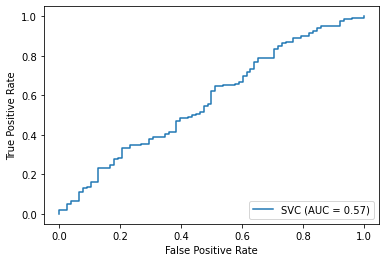

In [307]:
# Get the model metrics
metrics.plot_roc_curve(svc, X_test, Y_test)
plt.show()

## 5. Análisis Técnico - Decision Tree classifer

In [274]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [275]:
# Crear y entrenar el modelo de clasificador de árbol de decisión.
clf = DecisionTreeClassifier()
# Entrenar árbol de clasificación
clf = clf.fit(X_train,Y_train)

In [276]:
# Compruebe cómo le fue al modelo en el conjunto de datos de prueba
print(clf.score(X_test,Y_test))

0.5694444444444444


In [277]:
# Obtenga las métricas del modelo
# Matriz de confusión
tree_predictions = clf.predict(X_test)
print(confusion_matrix(Y_test,tree_predictions))

[[39 39]
 [54 84]]


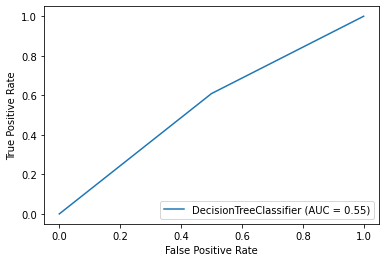

In [278]:
metrics.plot_roc_curve(clf, X_test, Y_test)  
plt.show()

In [279]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

In [280]:
rf = RandomForestClassifier()
# Train Random Forest
rf  = rf.fit(X_train,Y_train)
#Check how weel the model did on the testing data set
print(rf.score(X_test,Y_test))


0.6388888888888888


In [255]:
# Get the model metrics
rf_predictions = rf.predict(X_test)
print(confusion_matrix(Y_test,rf_predictions))

[[55 42]
 [46 73]]


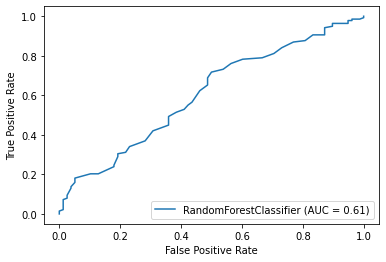

In [281]:
# Get the model metrics
metrics.plot_roc_curve(rf, X_test, Y_test)
plt.show()

## 6. Machine Learning - Redes neuronales

In [282]:
# Multi-layer Perceptron (MLP) 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [283]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [284]:
# ‘lbfgs’ is an optimizer in the family of quasi-Newton methods
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(32,16), random_state=1)
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100), random_state=1)
clf.fit(scaled_X_train, Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(32, 16), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [285]:
NN = clf.predict(scaled_X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, NN))

Accuracy: 0.6203703703703703


In [286]:
print(confusion_matrix(Y_test,NN))

[[ 20  58]
 [ 24 114]]


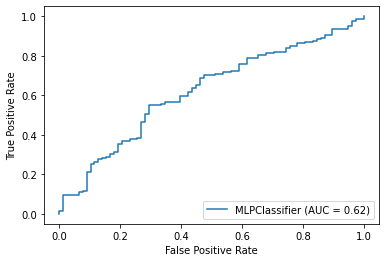

In [287]:
# Get the model metrics
from sklearn.metrics import plot_roc_curve
metrics.plot_roc_curve(clf, scaled_X_test, Y_test)
plt.show()